In [12]:
from BayesianHillModel import *
from matplotlib import pyplot as plt

# Overview

This project shows how to use a bayesian regression of the Hill model to quantify uncertainty in various dose-response parameters and how to propagate these on to summary metrics. 

In [26]:
# define our data 
Y = torch.tensor([1., 1., 1., 0.9, 0.7, 0.6, 0.2], dtype=torch.float)
X = torch.tensor([10./3**i for i in range(7)][::-1], dtype=torch.float).unsqueeze(-1)

# init our model
Model = BayesianHillModel()

## Priors

In the bayesian framework we must place priors on each of our variables. The probability distributions of these priors are visualized below. 

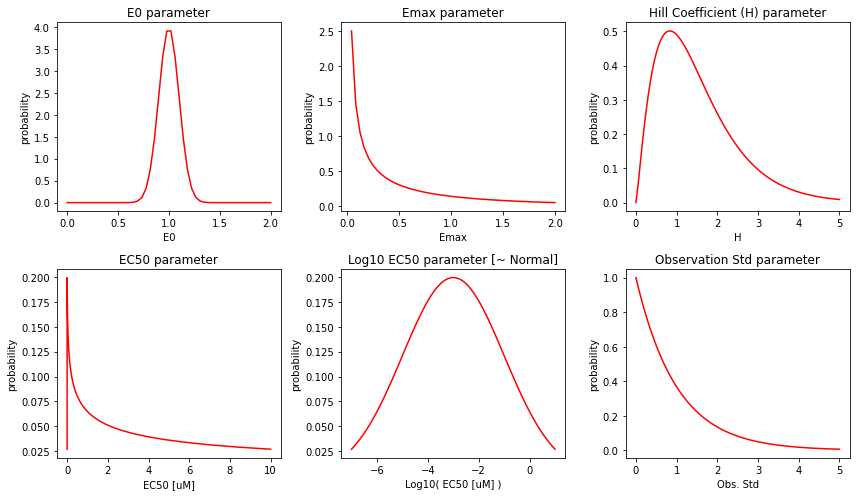

In [27]:
Model.plot_priors()

## prior regressions 

Another way to visualize the prior is to draw samples from our prior probabilities (plots above) and plot the subsequent models. This is an easy way to verify that our priors are reasonable for inhibitory dose response curves. 

No handles with labels found to put in legend.


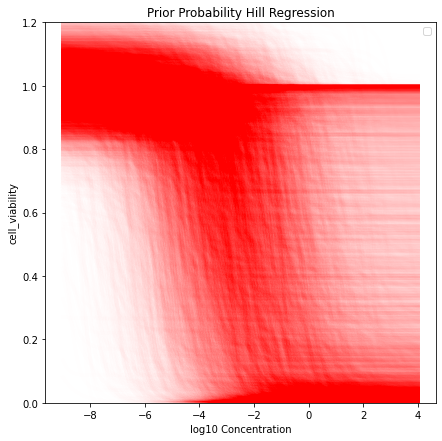

In [28]:
Model.plot_prior_regression(n_samples=10000)

## fit model 

We do this with MCMC, which is robust to overfitting, but can take longer to converge. This can be tuned but in general we recommend >400 samples. 

In [29]:
Model.fit(X,Y, num_samples=400, burnin=100)
conv = Model.check_converged(verbose=True)
print('model has converged:', conv)

Sample: 100%|██████████| 500/500 [00:43, 11.58it/s, step size=2.38e-01, acc. prob=0.812]


max/min rhat: (tensor(1.0160), tensor(0.9991))
model has converged: tensor(True)


## visualize fitted parameters 

This is a good way to identify the uncertainty in parameter values. Note x-axis as it's not fixed. 

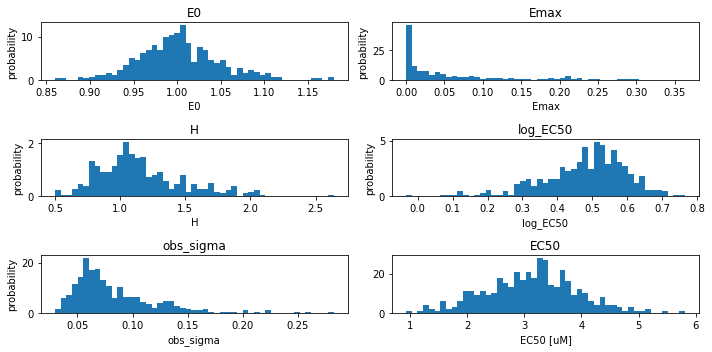

In [30]:
Model.plot_fitted_params()

## visualize fitted model regression 

To see how well the model fits, we can plot the sample regressions. 

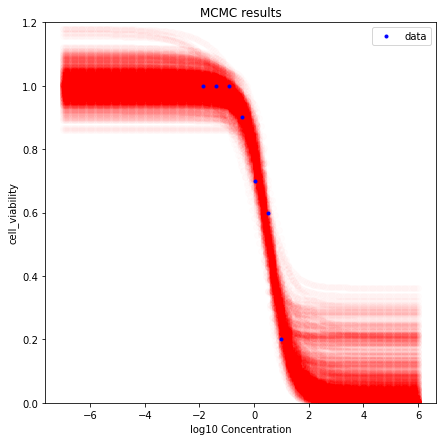

In [31]:
Model.plot_fit()

# summarize results 

This gives expectation, std, and confidence intervals on parameter values.

In [32]:
res = Model.summary(verbose=False)
res

,E0,Emax,H,log_EC50,obs_sigma
mean,tensor(1.0026),tensor(0.0602),tensor(1.1552),tensor(0.4793),tensor(0.0828)
std,tensor(0.0474),tensor(0.0802),tensor(0.3288),tensor(0.1217),tensor(0.0380)
median,tensor(1.0015),tensor(0.0233),tensor(1.0992),tensor(0.5012),tensor(0.0712)
5.0%,tensor(0.9375),tensor(3.4702e-08),tensor(0.6679),tensor(0.2800),tensor(0.0366)
95.0%,tensor(1.0910),tensor(0.2038),tensor(1.6964),tensor(0.6503),tensor(0.1370)
n_eff,tensor(158.7121),tensor(92.4419),tensor(103.1403),tensor(73.6773),tensor(141.6664)
r_hat,tensor(1.0160),tensor(0.9991),tensor(1.0002),tensor(1.0056),tensor(1.0036)


## access fitted samples 

MCMC produces samples that define the underlying variable distributions. These samples can be useful to propagate uncertainty on to additional calculations or analyses. 

In [33]:
samples = Model.get_samples()
samples.head()

,E0,Emax,H,log_EC50,obs_sigma
0,1.030100,0.008756,1.120386,0.633095,0.095084
1,0.859773,0.005583,1.875879,0.617587,0.093691
2,1.028405,0.002828,1.046583,0.432862,0.113103
3,1.021843,0.001445,0.782034,0.500313,0.114872
4,1.025616,0.000179,0.804698,0.597605,0.078912


## proagate uncertainty onto summary metrics 

To calculate the uncertainty in a summary metric, like IC50, we can use the method `get_ICxx(xx)`. Note- the ICxx's are returned in log concentration. 

Mean IC50: 0.6242537947142701


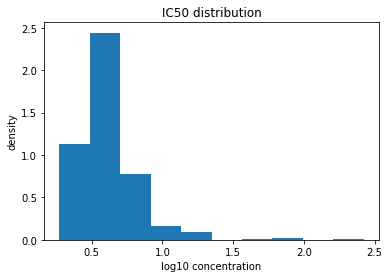

In [34]:
IC50s = Model.get_ICxx(0.5)
print('Mean IC50:', np.mean(IC50s))

plt.figure()
plt.title('IC50 distribution')
plt.hist(np.array(IC50s), density=True)
plt.xlabel('log10 concentration')
plt.ylabel('density')
plt.show()